In [1]:
import os
import sonia
from sonnia.sonnia import SoNNia
from sonnia.sonia import Sonia
from sonnia.plotting import Plotter
from sonnia.processing import Processing
import numpy as np
import pandas as pd

# load lists of sequences with gene specification

In [2]:
# this assume data sequences are in semi-colon separated text file, with gene specification
data_seqs = pd.read_csv('data_seqs.csv.gz')
data_seqs.head()

,junction_aa,v_gene,j_gene
0,CASSKQGASEAFF,TRBV7-8,TRBJ1-1
1,CASSPPPNYGYTF,TRBV6-1,TRBJ1-2
2,CASSTDTTEAFF,TRBV6-5,TRBJ1-1
3,CATERGGAPGFADTQYF,TRBV11-2,TRBJ2-3
4,CASSLITGENTEAFF,TRBV5-4,TRBJ1-1


# define and infer model

In [3]:
qm = SoNNia(data_seqs=data_seqs,pgen_model='humanTRB')

2025-10-02 08:19:07,884: Adding data seqs.
2025-10-02 08:19:07,947: 200000 sequences before filtering. Using /home/ec2-user/soNNia/sonnia/default_models/human_T_beta for filtering.


2025-10-02 08:19:08,157: 200000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-10-02 08:19:08,165: 200000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-10-02 08:19:08,215: 200000 sequences remain after removing data which are unproductive amino acid sequences.
2025-10-02 08:19:08,313: 200000 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'].
2025-10-02 08:19:08,351: 200000 sequences remain after removing sequences with CDR3 length larger than 30.
2025-10-02 08:19:08,351: 200000 sequences remain. Filtering completed.
2025-10-02 08:19:08,581: Encode data seqs.
Encoding sequence features: 100%|██████████| 200000/200000 [00:02<00:00, 87710.94it/s]


In [4]:
# add generated sequences (you can add them from file too)
qm.add_generated_seqs(int(5e5)) 

2025-10-02 08:19:11,374: Generating 500000 using the pgen model in /home/ec2-user/soNNia/sonnia/default_models/human_T_beta.
2025-10-02 08:19:14,327: Adding gen seqs.
2025-10-02 08:19:14,471: Using default index (0) for amino acid CDR3 sequences.
2025-10-02 08:19:14,471: Using default index (1) for V genes.
2025-10-02 08:19:14,487: Using default index (2) for J genes.
2025-10-02 08:19:14,657: 500000 sequences before filtering. Using /home/ec2-user/soNNia/sonnia/default_models/human_T_beta for filtering.
2025-10-02 08:19:15,249: 500000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-10-02 08:19:15,278: 500000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-10-02 08:19:15,406: 500000 sequences remain after removing data which are unproductive amino acid sequences.
2025-10-02 08:19:15,656: 500000 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F',

In [5]:
#define and train model
qm.infer_selection(epochs=50,batch_size=int(5e3))

2025-10-02 08:21:15,398: Finished training.
Computing energies: 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]
2025-10-02 08:21:16,527: Updating marginals.
Computing energies: 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]
2025-10-02 08:21:17,726: Finished updating marginals.


# do some plotting

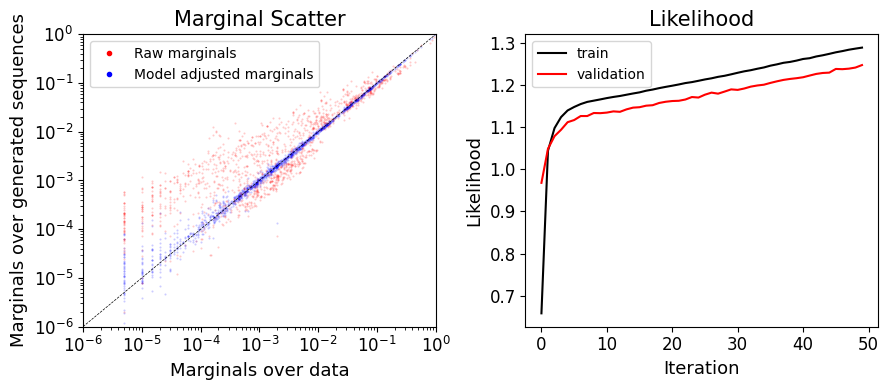

In [6]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

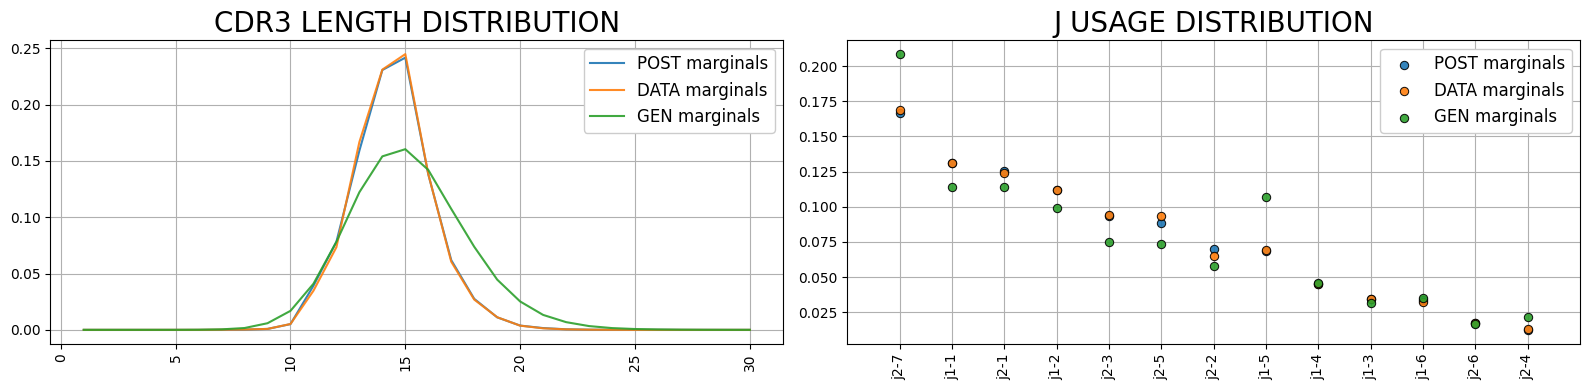

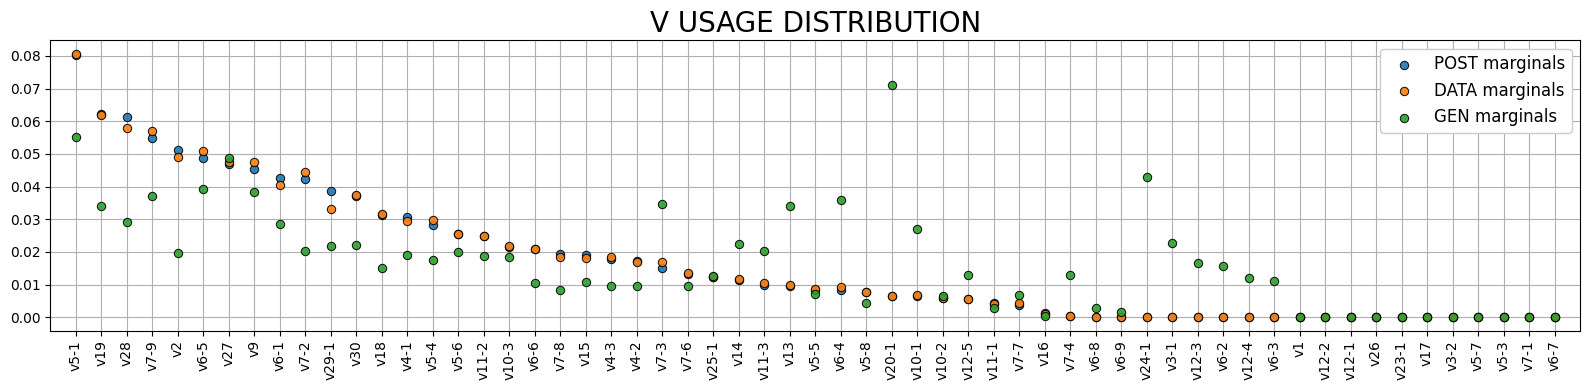

In [7]:
plot_sonia.plot_vjl()

# Generate sequences

In [8]:
pre_seqs=qm.generate_sequences_pre(int(1e4))
pre_seqs[:3]

Generating sequences: 100%|██████████| 10000/10000 [00:00<00:00, 11905.11it/s]


array([['CASSFGSWAGYGYTF', 'TRBV28', 'TRBJ1-2'],
       ['CSAREIIGMAYTQFF', 'TRBV20-1', 'TRBJ2-1'],
       ['CASSLVGQGPEAFF', 'TRBV11-2', 'TRBJ1-1']], dtype='<U78')

In [9]:
post_seqs=qm.generate_sequences_post(int(1e4))
post_seqs[:3]

Computing energies:   0%|          | 0/2 [00:00<?, ?it/s]/home/ec2-user/miniconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1', 'keras_tensor_2']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(
Computing energies: 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]


array([['CASSEPGRAKNIQYF', 'TRBV7-8', 'TRBJ2-4'],
       ['CASSQKLGLETQYF', 'TRBV4-1', 'TRBJ2-5'],
       ['CASSWPRKLMNTEAFF', 'TRBV7-2', 'TRBJ1-1']], dtype='<U87')

# Evaluate sequences

In [10]:
Q_data,pgen_data,ppost_data=qm.evaluate_seqs(qm.data_seqs[:int(1e4)].values)
Q_gen,pgen_gen,ppost_gen=qm.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=qm.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

Encoding sequence features:  47%|████▋     | 4657/10000 [00:00<00:00, 46564.72it/s]

Computing energies: 100%|██████████| 1/1 [00:00<00:00, 33.46it/s]


[1.3774681  2.204399   0.20214203]
[2.90796629e-10 6.30979439e-10 5.71589484e-12]
[4.00563082e-10 1.39093051e-09 1.15542259e-12]


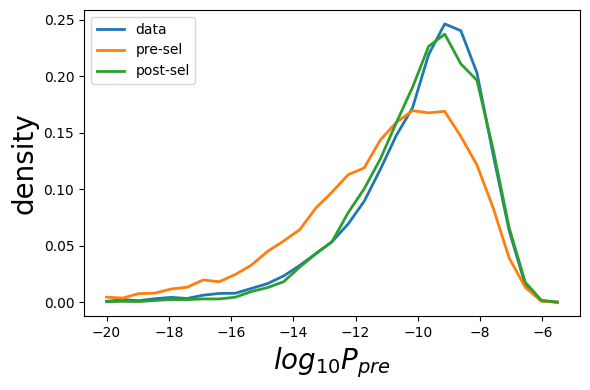

In [11]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}')

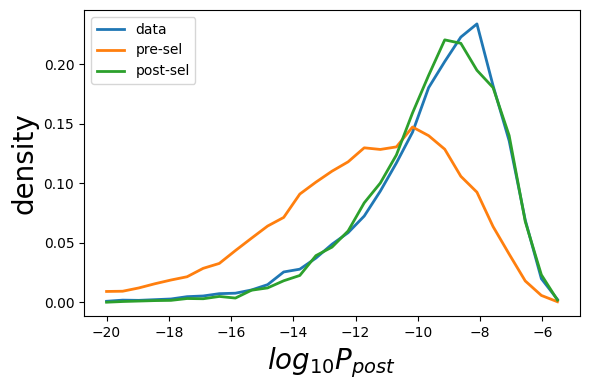

In [12]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}')

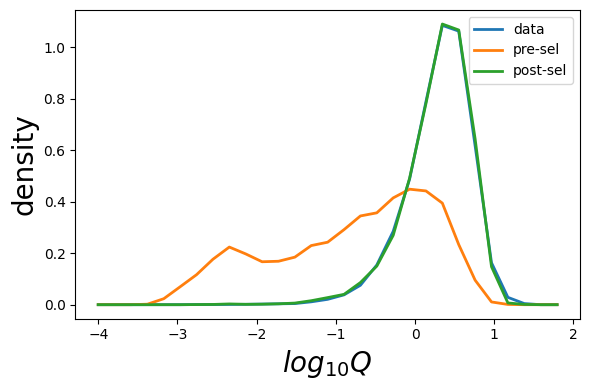

In [13]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

# some utils inherited from OLGA

In [14]:
# olga functionality can be directly accessed through the main SoNNia model

In [15]:
qm.seqgen_model.gen_rnd_prod_CDR3()

('TGTGCCAGCAGCCAGAACTACGAGCAGTACTTC', 'CASSQNYEQYF', 88, 13)

In [16]:
qm.genomic_data.genJ[1]

['TRBJ1-2*01',
 'CTAACTATGGCTACACCTTC',
 'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG']

In [17]:
qm.pgen_model.PinsDJ

array([6.17437e-02, 3.61889e-02, 9.09608e-02, 1.05828e-01, 1.37586e-01,
       1.14643e-01, 9.60481e-02, 8.14864e-02, 6.38634e-02, 4.92164e-02,
       3.93751e-02, 2.90524e-02, 2.30059e-02, 1.64381e-02, 1.45157e-02,
       1.13759e-02, 5.79127e-03, 5.97164e-03, 3.92779e-03, 2.96191e-03,
       2.04381e-03, 2.48417e-03, 9.09996e-04, 1.35102e-03, 2.44798e-04,
       4.52171e-04, 9.17052e-04, 6.28282e-04, 0.00000e+00, 1.41295e-05,
       9.74155e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

# Save and Load Model

In [18]:
qm.save_model('test')

In [19]:
qm_new=SoNNia(ppost_model='test')

/home/ec2-user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 15 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [20]:
# By default sequences are not added. Adding them now.
qm_new.update_model(add_data_seqs=qm.data_seqs,add_gen_seqs=qm.gen_seqs)

2025-10-02 08:21:59,980: Adding data seqs.
2025-10-02 08:22:00,045: 200000 sequences before filtering. Using test for filtering.
2025-10-02 08:22:00,282: 200000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-10-02 08:22:00,294: 200000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-10-02 08:22:00,344: 200000 sequences remain after removing data which are unproductive amino acid sequences.
2025-10-02 08:22:00,440: 200000 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'].
2025-10-02 08:22:00,475: 200000 sequences remain after removing sequences with CDR3 length larger than 30.
2025-10-02 08:22:00,476: 200000 sequences remain. Filtering completed.
2025-10-02 08:22:00,683: Adding gen seqs.
2025-10-02 08:22:00,842: 499997 sequences before filtering

In [21]:
# Continue inference
qm_new.infer_selection(epochs=5)
qm_new.learning_history.history

2025-10-02 08:22:25,272: Finished training.
Computing energies: 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]
2025-10-02 08:22:26,319: Updating marginals.
Computing energies: 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]
2025-10-02 08:22:27,458: Finished updating marginals.


{'_likelihood': [-0.8906164765357971,
  -0.8943267464637756,
  -0.8975707292556763,
  -0.8991937637329102,
  -0.9018761515617371],
 'binary_crossentropy': [0.4252474009990692,
  0.4243495762348175,
  0.42394524812698364,
  0.4235951602458954,
  0.4232470393180847],
 'loss': [0.425247460603714,
  0.42434969544410706,
  0.4239453375339508,
  0.42359504103660583,
  0.4232470691204071],
 'val__likelihood': [-0.8910130858421326,
  -0.8922667503356934,
  -0.8857039213180542,
  -0.8929635882377625,
  -0.8879517912864685],
 'val_binary_crossentropy': [0.4237324297428131,
  0.42577433586120605,
  0.4245329797267914,
  0.42336153984069824,
  0.42423421144485474],
 'val_loss': [0.4237324297428131,
  0.4257742464542389,
  0.424532949924469,
  0.423361599445343,
  0.4242342412471771]}

# Compute Diversity and Distance from Reference Distribution

In [22]:
print('model entropy is: ', qm_new.entropy(), '[bits]')

Computing energies: 100%|██████████| 1/1 [00:00<00:00, 42.44it/s]


model entropy is:  30.582659077398386 [bits]


In [23]:
print('Dkl post gen is: ', qm_new.dkl_post_gen(), '[bits]')

Dkl post gen is:  1.2409513 [bits]


# Load Default Sonia Models

In [24]:
# load beta model
beta_default_model=Sonia(ppost_model='humanTRB')